Tutorial: Plotting VIC Model Output
====

This Jupyter Notebook outlines one approach to plotting VIC output from the classic and image drivers. The tools used here are all freely available.

In [1]:
%matplotlib inline

import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

/Users/jhamman/anaconda/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# input files for example: 
asci_fname = '/Users/jhamman/workdir/VIC_tests_20160531/examples/Example-Classic-Stehekin-fewb/results/fluxes_48.1875_-120.6875.txt'
nc_fname = '/Users/jhamman/workdir/VIC_tests_20160331/examples/Example-Image-Stehekin-base-case/results/Stehekin.history.nc'

## Plotting Classic Driver Output

#### Reading VIC ASCII data:
We'll use pandas to parse the ASCII file.

In [3]:
# Use the pandas read_table function to read/parse the VIC output file
df = pd.read_table(asci_fname, comment='#', sep=r"\s*", engine='python', 
                   parse_dates=[[0, 1, 2]], index_col='YEAR_MONTH_DAY')
df.head()

,OUT_PREC,OUT_EVAP,OUT_RUNOFF,OUT_BASEFLOW,OUT_WDEW,OUT_SOIL_LIQ_0,OUT_SOIL_LIQ_1,OUT_SOIL_LIQ_2,OUT_RAD_TEMP,OUT_SWNET,...,OUT_GRND_FLUX,OUT_DELTAH,OUT_FUSION,OUT_AERO_RESIST,OUT_SURF_TEMP,OUT_ALBEDO,OUT_REL_HUMID,OUT_IN_LONG,OUT_AIR_TEMP,OUT_WIND
YEAR_MONTH_DAY,,,,,,,,,,,,,,,,,,,,,
1949-01-01,4.0488,0.5127,0.0002,0.3664,0.0,1074.9289,1075.4402,715.2995,260.8294,5.9157,...,-22.3248,-22.5923,0.0,118.1365,-9.1150,0.8158,69.7493,220.0001,-9.5276,4.49
1949-01-02,0.0000,0.1515,0.0000,0.3656,0.0,1074.4431,1075.4388,713.6348,254.7404,16.9485,...,-9.1654,-3.7829,0.0,62.8241,-16.9640,0.6510,59.2600,177.1149,-13.4942,2.66
1949-01-03,0.0000,0.0038,0.0000,0.3647,0.0,1073.9601,1075.4364,711.9741,249.6297,12.8363,...,-11.2951,-6.3547,0.0,249.7898,-22.1400,0.6489,76.5877,185.1597,-18.0142,0.64
1949-01-04,0.0000,-0.0040,0.0000,0.3639,0.0,1073.4798,1075.4332,710.3173,254.1290,7.7933,...,-6.0562,0.5830,0.0,82.7634,-18.4670,0.6483,85.9480,210.8265,-17.1740,2.01
1949-01-05,0.4488,-0.0547,0.0000,0.3630,0.0,1073.0022,1075.4290,708.6644,255.7232,4.6821,...,-4.5058,1.6561,0.0,279.0023,-16.6536,0.8500,87.9445,216.4266,-14.2423,1.88


### Plot 1: Time Series of Classic Driver Variables
Here we'll use `pandas`' built in plotting to plot 3 of the variables in the dataframe (`df`).

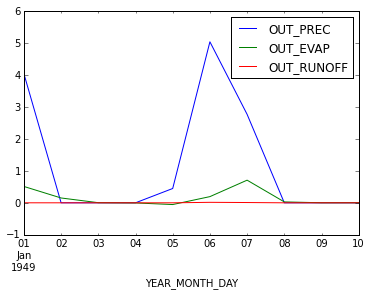

In [4]:
# Select the precipitation, evapotranspiration, and runoff variables and plot their timeseries.
df[['OUT_PREC', 'OUT_EVAP', 'OUT_RUNOFF']].plot()

## Plotting Image Driver Output
The image driver outputs netCDF files.  Here we'll use the `xarray` package to open the dataset, and make a few plots.

In [5]:
# Open the dataset
ds = xr.open_dataset(nc_fname)
ds

<xarray.Dataset>
Dimensions:         (lat: 4, lon: 5, nlayer: 3, time: 240)
Coordinates:
  * time            (time) datetime64[ns] 1949-01-01 1949-01-01T01:00:00 ...
  * lon             (lon) float64 -121.1 -120.9 -120.8 -120.7 -120.6
  * lat             (lat) float64 48.19 48.31 48.44 48.56
  * nlayer          (nlayer) int64 0 1 2
Data variables:
    OUT_SOIL_MOIST  (time, nlayer, lat, lon) float64 nan 15.44 15.44 15.44 ...
    OUT_SWE         (time, lat, lon) float64 nan 0.09958 0.008753 0.001741 ...
    OUT_BASEFLOW    (time, lat, lon) float64 nan 0.01529 0.01529 0.01529 nan ...
    OUT_EVAP        (time, lat, lon) float64 nan 0.06577 0.02227 0.008182 ...
    OUT_PREC        (time, lat, lon) float64 nan 0.4312 0.1531 0.1688 nan ...
    OUT_RAINF       (time, lat, lon) float64 nan 0.0 0.0 0.0 nan 0.0 0.0 0.0 ...
    OUT_RUNOFF      (time, lat, lon) float64 nan 0.0 0.0 0.0 nan 0.0 0.0 0.0 ...
    OUT_SNOWF       (time, lat, lon) float64 nan 0.4312 0.1531 0.1688 nan ...
    OUT_ALBEDO 

### Plot 2: Time slice of image driver output
Quick and simple, select a time slice of the EVAP variable and plot it.

/Users/jhamman/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


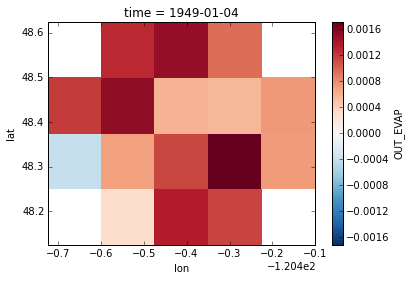

In [6]:

ds['OUT_EVAP'].sel(time='1949-01-04-00').plot()

### Plot 3: Multiple time slices of image driver output
Xarray allows you to plot multiple time periods at once, here we plot the daily average SWE.

/Users/jhamman/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


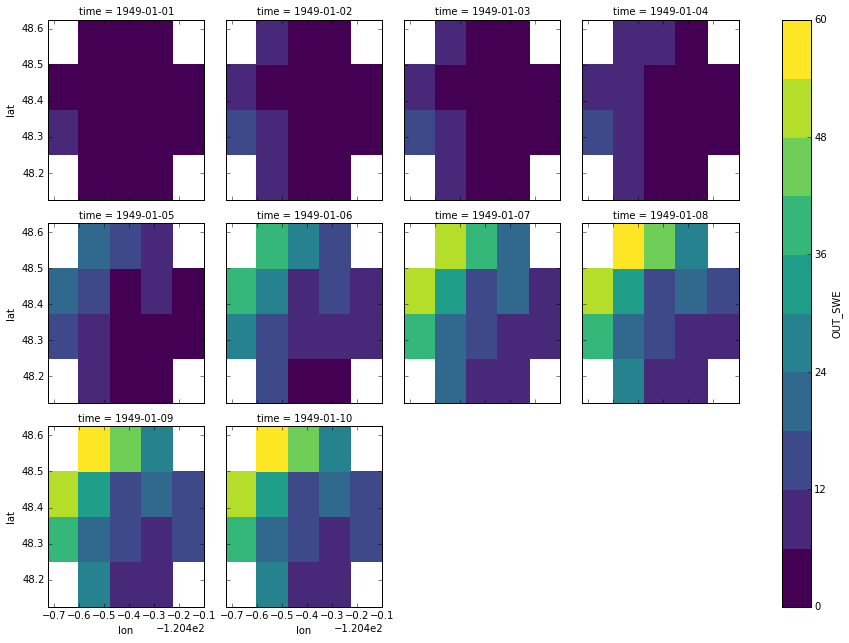

In [7]:
ds['OUT_SWE'].resample('1D', dim='time', how='mean').plot(col='time', col_wrap=4, levels=10)

### Plot 4: Multiple time slices of 4d image driver output
For 4d variables, we can again use the xarray facet grid, now time is along the x axis and soil layer is along the y axis

/Users/jhamman/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


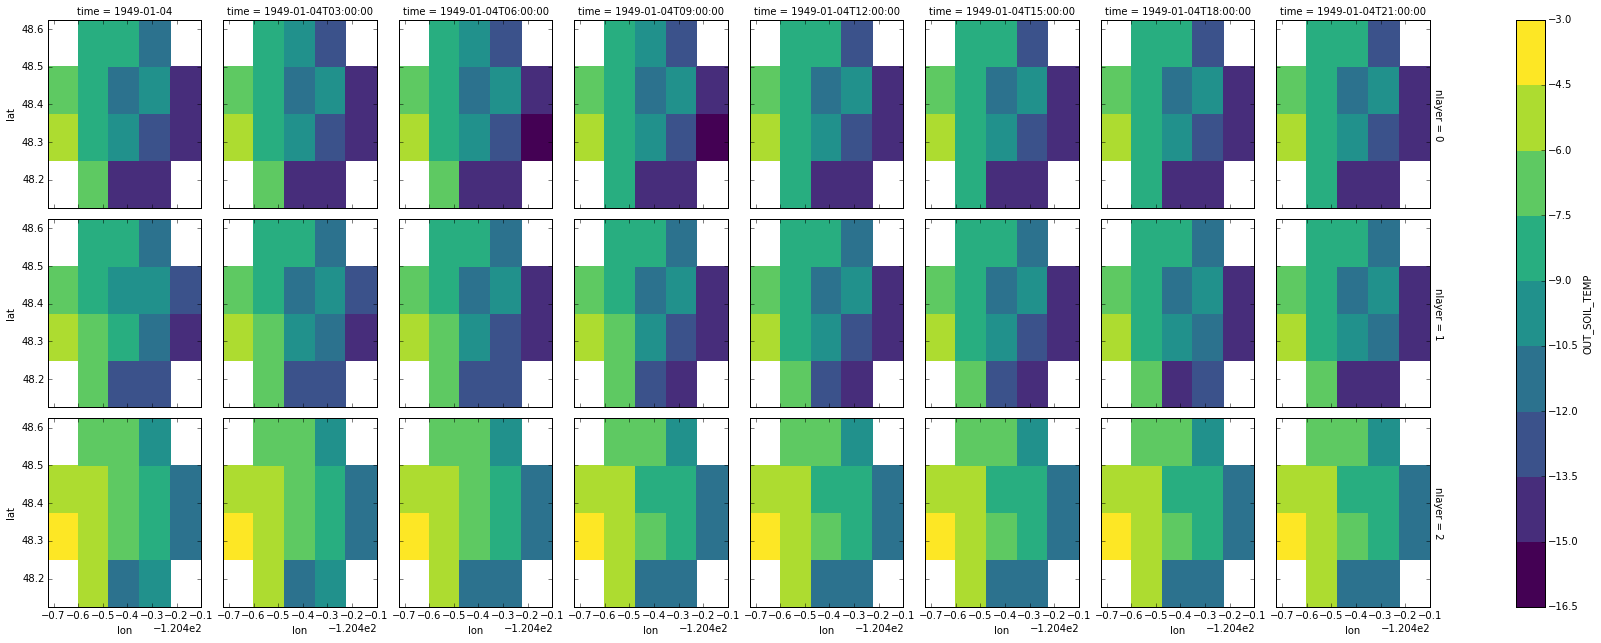

In [8]:
ds['OUT_SOIL_TEMP'].sel(time='1949-01-04').resample(
    '3h', dim='time', how='mean').plot(
        col='time', row='nlayer', levels=10)

### Plot 5: Using Cartopy to project VIC Image Driver Output
Often, we want to plot maps of VIC output that are georeferenced and include things like coastlines and political boundaries.  Here we use `xaray` plotting along with `cartopy` to plot the temporal mean evapotranspiration.

/Users/jhamman/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/Users/jhamman/anaconda/lib/python3.4/site-packages/numpy/lib/shape_base.py:431: FutureWarning: in the future np.array_split will retain the shape of arrays with a zero size, instead of replacing them by `array([])`, which always has a shape of (0,).
  FutureWarning)


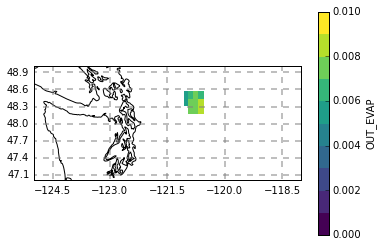

In [9]:
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator()))

ds['OUT_EVAP'].mean(dim='time').plot.pcolormesh('lon', 'lat', ax=ax,
                                                levels=10, vmin=0, vmax=0.01,
                                                transform=ccrs.PlateCarree())

# Configure the map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.set_extent([-125, -118, 47, 49], ccrs.Geodetic())
ax.coastlines('10m')
gl.xlabels_top = False
gl.ylabels_right = False

### Plot 6: Plotting domain mean timeseries from VIC Image Driver Output
Here, we'll take the domain mean of the downward shortwave radiation and will use pandas to plot the data.

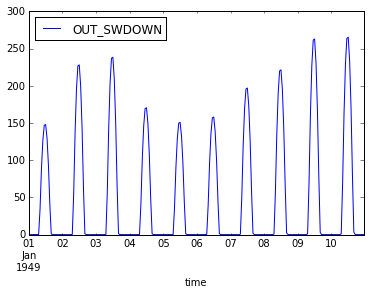

In [10]:
ds['OUT_SWDOWN'].mean(dim=('lon', 'lat')).to_dataframe().plot()

### Plot 7: Plotting timeseries at a point from VIC Image Driver Output
Here, we'll take a single point of the surface albedo variable and will use pandas to plot the data.

(0, 1)

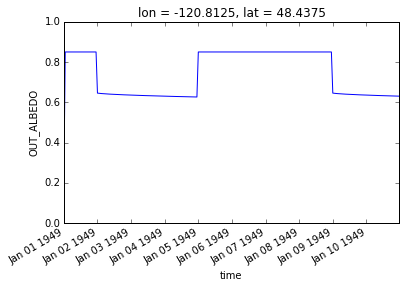

In [11]:
ds['OUT_ALBEDO'].isel(lat=2, lon=2).plot()
plt.ylim(0, 1)

In [12]:
plt.close('all')